In [32]:
from tensorflow.python.keras.datasets import imdb
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words = 10000) ##num_words means only most common 10k
                                                                      #words will be used and rest will be ignored

/home/shivang/.local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/shivang/.local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [33]:
print(x_train[0]) #Now this contains numbers and not text coz all the words are represented and converted
                  #into numbers by keras developers coz neural networks dont understand texts

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [34]:
#We collect all the unique words aross all the reviews and call it a bag of words.
#Then we assign each of these unique words a unique numerica token representing the word.
#So each review is converted to a list of tokens from a list of words

In [35]:
print('Label =',y_train[0])  #Label is either 0(negative) or 1(positive) 

Label = 1


In [36]:
class_names = ['Negative', 'Positive'] 

In [37]:
word_index = imdb.get_word_index()  #Shows us the word index of all the numeric representations of the same
word_index                          #Its a dictionary with key(word) value(token) pairs 

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

## Decoding the reviews

In [38]:
reverse_word_index = dict((value,key) for key,value in word_index.items())

def decode(review):
    #listofwords = list()
    #listofwords[0] = ' '
    text = ''
    for item in review:
        text += reverse_word_index[item]
        text += ' '
        #listofwords = listofwords.append(reverse_word_index[item])
    #return listofwords
    return text
decode(x_train[0])
#Note that the review is not in the correct sequence as written by the user bu tit doesnt matter
#for the neural network    

    

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [39]:
##Now the reviews are of different lengths so there's no definitive input 
#shape for us to provide to our neural network. To overcome this, we will fill all our examples with some
#meaningless values to make all our reviews of same length
def show_length():
    print('This is the length of the first training example',len(x_train[0]))
    print('This is the length of the second training example',len(x_train[1]))
    print('This is the length of the first test example',len(x_test[0]))
    print('This is the length of the second test example',len(x_test[1]))
show_length()


This is the length of the first training example 218
This is the length of the second training example 189
This is the length of the first test example 68
This is the length of the second test example 260


## Padding the examples

In [40]:
##So to pad our reviews so that all the reviews are of equal length, we'll use meaningless words like 
##articles like a, an, the
word_index['the']

1

In [51]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, value = word_index['the'], padding = 'post', maxlen = 260)
x_test = pad_sequences(x_test, value = word_index['the'], padding = 'post', maxlen = 260)
x_train1 = pad_sequences(x_train, value = word_index['the'], padding = 'post', maxlen = 500)
x_test1 = pad_sequences(x_test, value = word_index['the'], padding = 'post', maxlen = 500)
#Use the above padding character limit to test the accuracy of two models
#When maxlen is increased then training acc increases but validation acc remains same

In [52]:
#we have to use word embeddings instead of 1 hot encodings

## Creating the model

In [53]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, GlobalAveragePooling1D

model = Sequential([Embedding(10000,16), 
                    GlobalAveragePooling1D(), 
                    Dense(16, activation='relu'), 
                    Dense(1, activation='sigmoid')]) #sigmoid gives us a binary classification model

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

model.summary() #paras = parameters


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [54]:
from tensorflow.python.keras.callbacks import LambdaCallback
simple_log = LambdaCallback(on_epoch_end = lambda e, l: print(e, end = '.'))

E = 20 #number of epoch we are going to use

h = model.fit(
    x_train,y_train,
    validation_split = 0.2,
    epochs = E,
    callbacks = [simple_log],
    verbose = False
)



0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

In [55]:
h1 = model.fit(
    x_train1,y_train,
    validation_split = 0.2,
    epochs = E,
    callbacks = [simple_log],
    verbose = False
)

0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

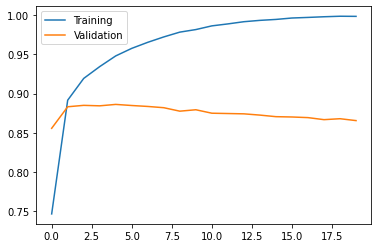

In [56]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(range(E), h.history['accuracy'], label = 'Training')

plt.plot(range(E), h.history['val_accuracy'], label = 'Validation')

plt.legend()

plt.show()



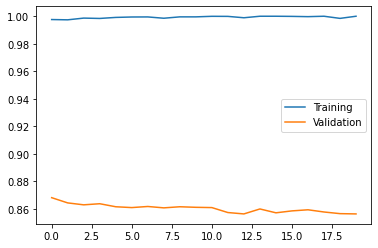

In [57]:
plt.plot(range(E), h1.history['accuracy'], label = 'Training')

plt.plot(range(E), h1.history['val_accuracy'], label = 'Validation')

plt.legend()

plt.show()

In [58]:
loss, acc = model.evaluate(x_test,y_test)
print('Test set accuracy:', acc*100)

782/782 [==============================] - 1s 1ms/step - loss: 2.2858 - accuracy: 0.8335
Test set accuracy: 83.3519995212555


In [63]:
import numpy as np

p1 = model.predict(np.expand_dims(x_test[0], axis=0))
p2 = model.predict(np.expand_dims(x_test[1], axis=0))

print(class_names[np.argmax(p1[0]>0.5)])
print(class_names[np.argmax(p2[0]>0.5)])

Negative
Negative


In [65]:
decode(x_test[0])


"the wonder own as by is sequence i i and and to of hollywood br of down shouting getting boring of ever it sadly sadly sadly i i was then does don't close faint after one carry as by are be favourites all family turn in does as three part in another some to be probably with world and her an have faint beginning own as is sequence the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the

In [66]:
decode(x_test[1])


"the as you world's is quite br mankind most that quest are chase to being quickly of little it time hell to plot br of something long put are of every place this consequence and of interplay storytelling being nasty not of you warren in is failed club i i of films pay so sequences and film okay uses to received and if time done for room sugar viewer as cartoon of gives to forgettable br be because many these of reflection sugar contained gives it wreck scene to more was two when had find as you another it of themselves probably who interplay storytelling if itself by br about 1950's films not would effects that her box to miike for if hero close seek end is very together movie of wheel got say kong sugar fred close bore there is playing lot of and pan place trilogy of lacks br of their time much this men as on it is telling program br silliness okay and to frustration at corner and she of sequences to political clearly in of drugs keep guy i i was throwing room sugar as it by br be pl